# this notebook is just for testing

In [1]:
from platform import python_version
print(python_version())

3.8.10


-assessed= tests_vids/OPT_vids/fx_dist/rush_fiel_vmaf40fx_AVC.mp4
-assessed= tests_vids/OPT_vids/fx_dist/rush_fiel_vmaf50fx_AVC.mp4
-assessed= tests_vids/OPT_vids/fx_dist/rush_fiel_vmaf60fx_AVC.mp4
-assessed= tests_vids/OPT_vids/fx_dist/rush_fiel_vmaf70fx_AVC.mp4
-assessed= tests_vids/OPT_vids/fx_dist/rush_fiel_vmaf80fx_AVC.mp4
-assessed= tests_vids/OPT_vids/fx_dist/rush_fiel_vmaf85fx_AVC.mp4
-assessed= tests_vids/OPT_vids/fx_dist/rush_fiel_vmaf90fx_AVC.mp4
-assessed= tests_vids/OPT_vids/fx_dist/rush_fiel_vmaf93fx_AVC.mp4
-assessed= tests_vids/OPT_vids/fx_dist/rush_fiel_vmaf96fx_AVC.mp4
-assessed= tests_vids/OPT_vids/fx_dist/rush_fiel_vmaf98fx_AVC.mp4
[ 1071949.  1547628.  1964700.  2794685.  3990316.  5088395.  6556684.
  8644030. 13905579. 19830560.]
[36.781358 48.74769  56.925659 68.46761  78.529488 84.097332 88.622652
 92.087602 95.769538 97.527193]
-assessed= tests_vids/OPT_vids/lg_dist/rush_fiel_vmaf40lg_AVC.mp4
-assessed= tests_vids/OPT_vids/lg_dist/rush_fiel_vmaf50lg_AVC.mp4
-a

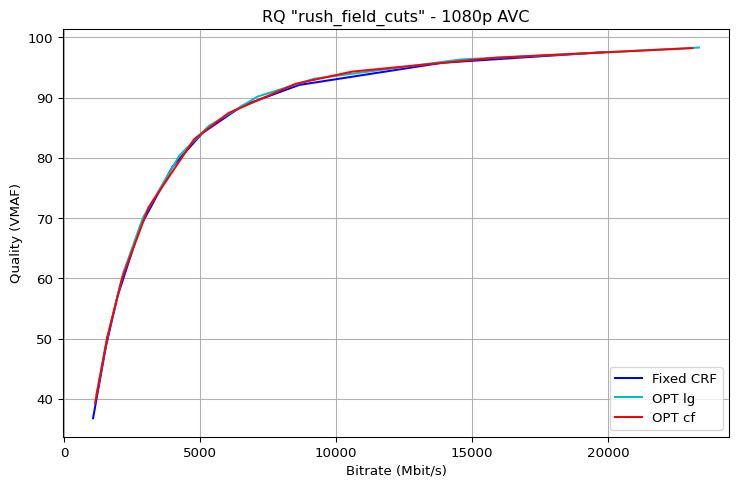

<Figure size 432x288 with 0 Axes>

In [2]:
import os
import subprocess
import json
import numpy as np
import matplotlib.pyplot as pl
import tkinter as tk #to import file
from tkinter import filedialog #to open import dialog

def print_info(file):
    command = f"ffprobe -v error -select_streams v:0 -show_entries format:stream -print_format json {file}"
    cout = subprocess.run(command.split(), stdout=subprocess.PIPE, stderr=subprocess.STDOUT).stdout
    jout = json.loads(cout)
    print(jout)
            
def get_bitrate(file):
    command = f"ffprobe -v error -select_streams v:0 -show_entries format:stream -print_format json {file}"
    cout = subprocess.run(command.split(), stdout=subprocess.PIPE, stderr=subprocess.STDOUT).stdout
    jout = json.loads(cout)  # Convert data from JSON string to dictionary
    return int(jout["format"]["bit_rate"])

def get_vmaf(dist,ref):
    c_vmaf = f"ffmpeg -i {ref} -i {dist} -hide_banner -loglevel error\
            -lavfi \"[0:v]setpts=PTS-STARTPTS[ref];\
                    [1:v]scale={res[0]}x{res[1]}:flags=bicubic,setpts=PTS-STARTPTS[dist];\
                    [dist][ref]libvmaf=feature=name=psnr:log_path=config/vmaf_logs.json:log_fmt=json\" \
            -f null -" #|name=float_ssim|name=float_ms_ssim to compute the other metrics
    subprocess.call(c_vmaf, shell=True)
    print("-assessed= " + dist)
    with open("config/vmaf_logs.json", 'r') as r: #extract quality and rate values
        i_data = json.load(r)
    return i_data["pooled_metrics"]["vmaf"]["mean"]
    
def scale():
    c_seq = "ffmpeg -i test_vids/srcRAW_FullHD/rush_field_cuts_1080p.y4m \
        -filter:v scale=480x270 test_vids/srcRAW_SD/rush_field_cuts_SDp.y4m"
    subprocess.call(c_seq, shell=True)
    
def open_file():
    root = tk.Tk()
    root.withdraw()
    f = os.path.relpath(filedialog.askopenfilename())
    #file_name = os.path.basename(source_path).split('.')[0]
    return f

res = [1920,1080]
#file = "tests_vids/OPT_vids/rush_fiel_vmaf90fx_AVC.mp4"
#file="tests_vids/OPT_vids/rush_fiel_rate1000000fx_AVC.mp4"
f_ref = "tests_vids/srcRAW_FullHD/rush_field_cuts_1080p.y4m"
#print(get_bitrate(file))
#print(get_vmaf(file,f_ref,res))
#print_info("tests_vids/OPT_vids/fx_rate/rush_fiel_rate1000000fx_AVC.mp4")
plot = {"PLOT": True, "FX": True, "BF": False, "LG": True, "CF": True, "TARGET": "dist"}

if plot["PLOT"]:
    my_dpi = 96
    pl.figure(figsize=(860/my_dpi, 540/my_dpi), dpi=my_dpi)

    if plot["FX"]:
        folder = "tests_vids/OPT_vids/fx_"+plot["TARGET"]+"/"
        rate = np.zeros(len(os.listdir(folder)))
        dist = np.zeros(len(os.listdir(folder)))
        i = 0
        for vid in sorted(os.listdir(folder)):
            rate[i] = get_bitrate(folder + vid)
            dist[i] = get_vmaf(folder + vid,f_ref)
            i += 1
        print(rate)
        print(dist)
        pl.plot(rate/1000, dist, '-b', label="Fixed CRF")

    if plot["BF"]:
        folder = "tests_vids/OPT_vids/bf_"+plot["TARGET"]+"/"
        rate = np.zeros(len(os.listdir(folder)))
        dist = np.zeros(len(os.listdir(folder)))
        i = 0
        for vid in sorted(os.listdir(folder)):
            rate[i] = get_bitrate(folder + vid)
            dist[i] = get_vmaf(folder + vid,f_ref)
            i += 1
        print(rate)
        print(dist)
        pl.plot(rate/1000, dist, '-g', label="OPT bf")

    if plot["LG"]:
        folder = "tests_vids/OPT_vids/lg_"+plot["TARGET"]+"/"
        rate = np.zeros(len(os.listdir(folder)))
        dist = np.zeros(len(os.listdir(folder)))
        i = 0
        for vid in sorted(os.listdir(folder)):
            rate[i] = get_bitrate(folder + vid)
            dist[i] = get_vmaf(folder + vid,f_ref)
            i += 1
        print(rate)
        print(dist)
        pl.plot(rate/1000, dist, '-c', label="OPT lg")

    if plot["CF"]:
        folder = "tests_vids/OPT_vids/cf_"+plot["TARGET"]+"/"
        rate = np.zeros(len(os.listdir(folder)))
        dist = np.zeros(len(os.listdir(folder)))
        i = 0
        for vid in sorted(os.listdir(folder)):
            rate[i] = get_bitrate(folder + vid)
            dist[i] = get_vmaf(folder + vid,f_ref)
            i += 1
        print(rate)
        print(dist)
        pl.plot(rate/1000, dist, '-r', label="OPT cf")

    pl.grid(True)
    pl.title("RQ \"rush_field_cuts\" - 1080p AVC")
    pl.ylabel("Quality (VMAF)")
    pl.xlabel("Bitrate (Mbit/s)")
    pl.legend(loc="lower right")
    pl.figure()


In [679]:
rng = np.array([1,2,1,1,1])
print(np.var(rng))

0.16000000000000006
